# Evaluating Mini-batch training on the dummy data generated

*mainly to test whether the mini-batch training code is correct by evaluating at the results.

## Get the data

In [1]:
import os
import numpy as np

# define lists to store results
batch_sizes = []
all_losses = {}
all_train_accuracies = {}
all_test_accuracies = {}

folder = '../log/mini-batch-dummy-data-logs'
for file in os.listdir(folder):

    # get the batch size
    batch_size = int(file.strip(".txt").strip("batch"))

    # get the data
    f = open(os.path.join(folder, file))
    data = f.readlines()[4:]
    f.close()

    # extract the necessary information
    losses = np.zeros(len(data))
    train_accuracies = np.zeros(len(data))
    test_accuracies = np.zeros(len(data))
    for i, line in enumerate(data):
        line = line.strip("\n")
        losses[i] = float(line.split(",")[0].split("=")[1])
        train_accuracies[i] = float(line.split(",")[1].split("=")[1].strip("%"))
        test_accuracies[i] = float(line.split(",")[1].split("=")[1].strip("%"))

    # add them to the lists
    batch_sizes.append(batch_size)
    all_losses[batch_size] = losses
    all_train_accuracies[batch_size] = train_accuracies
    all_test_accuracies[batch_size] = test_accuracies

## Plot the graphs

In [2]:
import matplotlib.pyplot as plt

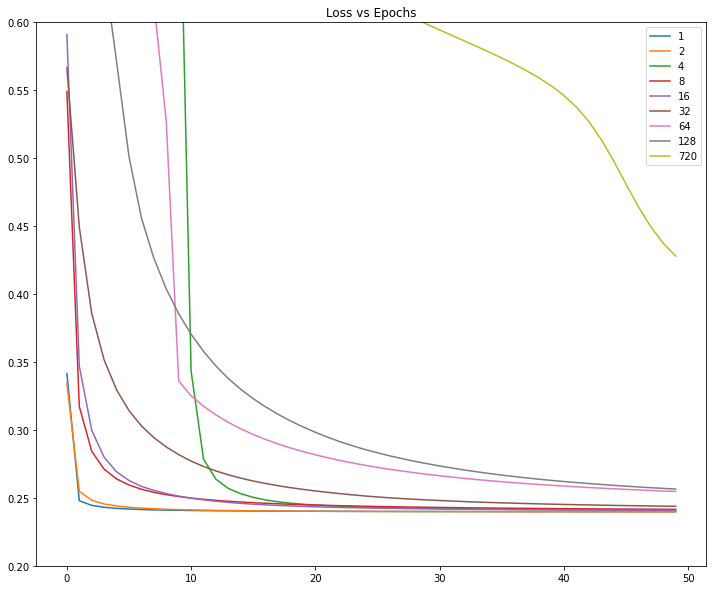

In [3]:
# sort the dictionary
# reference: https://stackoverflow.com/questions/9001509/how-do-i-sort-a-dictionary-by-key/47017849#47017849
all_losses = dict(sorted(all_losses.items()))


plt.figure(figsize=(12, 10))
plt.title('Loss vs Epochs')
for batch_size, losses in all_losses.items():
    plt.plot(losses, label=str(batch_size))

plt.legend()
plt.ylim((0.2, 0.6))
plt.show()

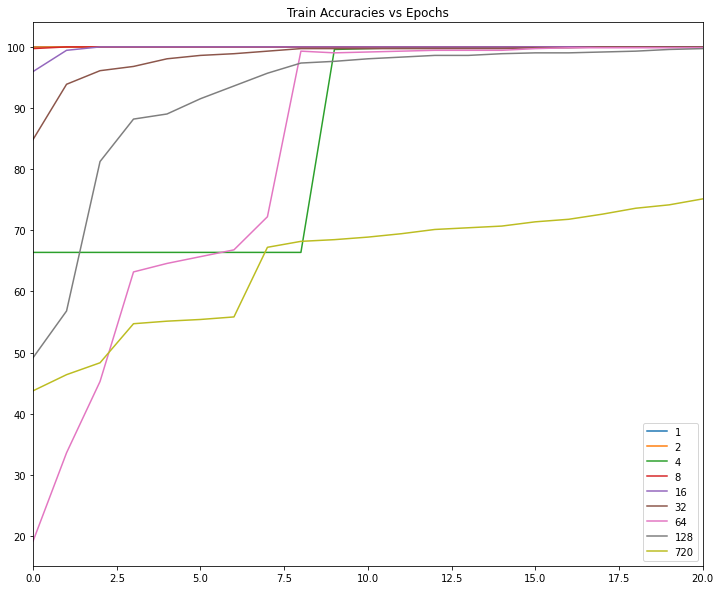

In [4]:
# sort the dictionary
# reference: https://stackoverflow.com/questions/9001509/how-do-i-sort-a-dictionary-by-key/47017849#47017849
all_train_accuracies = dict(sorted(all_train_accuracies.items()))

plt.figure(figsize=(12, 10))
plt.title('Train Accuracies vs Epochs')
for batch_size, train_accuracies in all_train_accuracies.items():
    plt.plot(train_accuracies, label=str(batch_size))

plt.legend()
plt.xlim((0, 20))
plt.show()